# HOUGH TRANSFORM

In [42]:
import cv2
from utils import s
import numpy as np

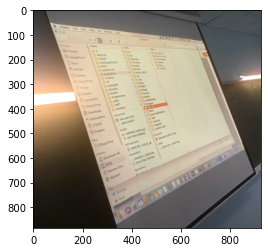

In [43]:
im = cv2.imread("input/hough.png")
s(im)

In [44]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,200)

## HOUGH LINE DETECTION API

In [45]:
max_slider = 270
lines = cv2.HoughLinesP(edges,1,np.pi/180,max_slider,minLineLength=30,maxLineGap=250)
lines = lines.reshape(lines.shape[0],lines.shape[2],lines.shape[1]).squeeze(-1)
print(lines)

[[ 76  73 704 139]
 [336 866 860 563]
 [321 817 849 537]]


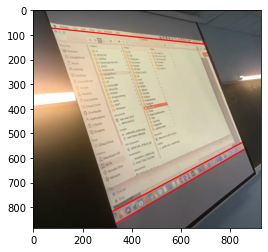

In [46]:
im_clone = im.copy()
for line in lines:
    x1,y1,x2,y2 =line 
    cv2.line(im_clone,(x1,y1),(x2,y2),(255,0,0),3)
s(im_clone)

In [47]:
line_top = lines[lines[:,:1].argmin()]
line_bot = lines[lines[:,:1].argmax()]

In [48]:
pt_A = line_top[:2]
pt_B = line_bot[:2]
pt_C = line_bot[2:]
pt_D = line_top[2:]

In [49]:
width_AD = np.sqrt(((pt_A[0]-pt_D[0])**2) + ((pt_A[1]-pt_D[1])**2))
width_BC = np.sqrt(((pt_B[0]-pt_C[0])**2) + ((pt_B[1]-pt_C[1])**2))
maxWidth = max(int(width_AD),int(width_BC))

In [50]:
height_AB = np.sqrt(((pt_A[0] - pt_B[0]) ** 2) + ((pt_A[1] - pt_B[1]) ** 2))
height_CD = np.sqrt(((pt_C[0] - pt_D[0]) ** 2) + ((pt_C[1] - pt_D[1]) ** 2))
maxHeight = max(int(height_AB), int(height_CD))

In [51]:

input_pts = np.float32([pt_A, pt_B, pt_C, pt_D])
output_pts = np.float32([[0, 0],
                        [0, maxHeight - 1],
                        [maxWidth - 1, maxHeight - 1],
                        [maxWidth - 1, 0]])

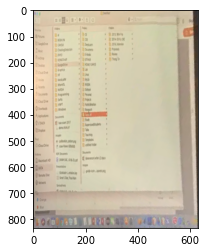

In [52]:
M = cv2.getPerspectiveTransform(input_pts,output_pts)
out = cv2.warpPerspective(im,M,(maxWidth,maxHeight),flags=cv2.INTER_LINEAR)
s(out)

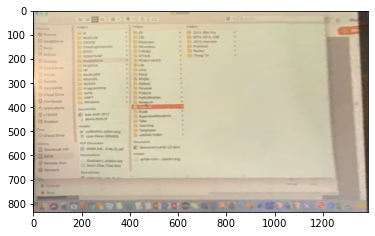

In [53]:
scale_percent_width =220
width = int(out.shape[1]*scale_percent_width/100)
height=int(out.shape[0])
dim = (width,height)
resized = cv2.resize(out,dim,interpolation=cv2.INTER_AREA)
s(resized)

## HOUGH LINE DETECTION IMPLEMENT